In [106]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [107]:
uber_req = pd.read_csv("Uber Request Data.csv")

In [108]:
uber_req.head()

,Request id,Pickup point,Driver id,Status,Request timestamp,Drop timestamp
0,619,Airport,1.0,Trip Completed,11/7/2016 11:51,11/7/2016 13:00
1,867,Airport,1.0,Trip Completed,11/7/2016 17:57,11/7/2016 18:47
2,1807,City,1.0,Trip Completed,12/7/2016 9:17,12/7/2016 9:58
3,2532,Airport,1.0,Trip Completed,12/7/2016 21:08,12/7/2016 22:03
4,3112,City,1.0,Trip Completed,13-07-2016 08:33:16,13-07-2016 09:25:47


In [109]:
uber_req.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6745 entries, 0 to 6744
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Request id         6745 non-null   int64  
 1   Pickup point       6745 non-null   object 
 2   Driver id          4095 non-null   float64
 3   Status             6745 non-null   object 
 4   Request timestamp  6745 non-null   object 
 5   Drop timestamp     2831 non-null   object 
dtypes: float64(1), int64(1), object(4)
memory usage: 316.3+ KB


In [110]:
uber_req.shape

(6745, 6)

In [111]:
uber_req["Driver id"].isnull().sum()

2650

In [112]:
uber_req[uber_req["Driver id"].isnull()]

,Request id,Pickup point,Driver id,Status,Request timestamp,Drop timestamp
4095,1362,City,NaN,No Cars Available,11/7/2016 0:02,NaN
4096,1364,City,NaN,No Cars Available,11/7/2016 0:06,NaN
4097,1366,City,NaN,No Cars Available,11/7/2016 0:09,NaN
4098,2,Airport,NaN,No Cars Available,11/7/2016 0:23,NaN
4099,7,Airport,NaN,No Cars Available,11/7/2016 0:30,NaN
...,...,...,...,...,...,...
6740,6745,City,NaN,No Cars Available,15-07-2016 23:49:03,NaN
6741,6752,Airport,NaN,No Cars Available,15-07-2016 23:50:05,NaN
6742,6751,City,NaN,No Cars Available,15-07-2016 23:52:06,NaN
6743,6754,City,NaN,No Cars Available,15-07-2016 23:54:39,NaN


Since status of the ride is "No Car Available" so missing values in Driver id column is of Missing  at random.So not handling null values as it is not required for our business problem




In [113]:
uber_req["Drop timestamp"].isnull().sum()

3914

In [114]:
uber_req[uber_req["Drop timestamp"].isnull()]

,Request id,Pickup point,Driver id,Status,Request timestamp,Drop timestamp
2831,2905,City,1.0,Cancelled,13-07-2016 06:08:41,NaN
2832,4805,City,1.0,Cancelled,14-07-2016 17:07:58,NaN
2833,5202,Airport,1.0,Cancelled,14-07-2016 20:51:37,NaN
2834,5927,City,1.0,Cancelled,15-07-2016 10:12:40,NaN
2835,2347,Airport,2.0,Cancelled,12/7/2016 19:14,NaN
...,...,...,...,...,...,...
6740,6745,City,NaN,No Cars Available,15-07-2016 23:49:03,NaN
6741,6752,Airport,NaN,No Cars Available,15-07-2016 23:50:05,NaN
6742,6751,City,NaN,No Cars Available,15-07-2016 23:52:06,NaN
6743,6754,City,NaN,No Cars Available,15-07-2016 23:54:39,NaN


Since status of the rides are "No Car Available" and "Cancelled" so missing values in Drop timestamp column is of Missing  at random.
So not handling null values as it is not required for our business problem

In [115]:
uber_reqc = uber_req.copy()

In [116]:
uber_reqc

,Request id,Pickup point,Driver id,Status,Request timestamp,Drop timestamp
0,619,Airport,1.0,Trip Completed,11/7/2016 11:51,11/7/2016 13:00
1,867,Airport,1.0,Trip Completed,11/7/2016 17:57,11/7/2016 18:47
2,1807,City,1.0,Trip Completed,12/7/2016 9:17,12/7/2016 9:58
3,2532,Airport,1.0,Trip Completed,12/7/2016 21:08,12/7/2016 22:03
4,3112,City,1.0,Trip Completed,13-07-2016 08:33:16,13-07-2016 09:25:47
...,...,...,...,...,...,...
6740,6745,City,NaN,No Cars Available,15-07-2016 23:49:03,NaN
6741,6752,Airport,NaN,No Cars Available,15-07-2016 23:50:05,NaN
6742,6751,City,NaN,No Cars Available,15-07-2016 23:52:06,NaN
6743,6754,City,NaN,No Cars Available,15-07-2016 23:54:39,NaN


In [117]:
#Converting Request timestamp column from string to Datetime. Convert function is used as we can see the Request timestamp 
#column and Drop timestamp columns have different datetime formats.
import datetime
def convert(s):
    if isinstance(s,float):
        return s
    else:
        try:
            date = datetime.datetime.strptime(s, '%d-%m-%Y %H:%M:%S')
            return (date)
        except ValueError as err:
            e =(err)
        date = datetime.datetime.strptime(s, '%d/%m/%Y %H:%M')
        return date
uber_reqc["Request timestamp"] = uber_reqc["Request timestamp"].apply(convert)

In [118]:
uber_reqc

,Request id,Pickup point,Driver id,Status,Request timestamp,Drop timestamp
0,619,Airport,1.0,Trip Completed,2016-07-11 11:51:00,11/7/2016 13:00
1,867,Airport,1.0,Trip Completed,2016-07-11 17:57:00,11/7/2016 18:47
2,1807,City,1.0,Trip Completed,2016-07-12 09:17:00,12/7/2016 9:58
3,2532,Airport,1.0,Trip Completed,2016-07-12 21:08:00,12/7/2016 22:03
4,3112,City,1.0,Trip Completed,2016-07-13 08:33:16,13-07-2016 09:25:47
...,...,...,...,...,...,...
6740,6745,City,NaN,No Cars Available,2016-07-15 23:49:03,NaN
6741,6752,Airport,NaN,No Cars Available,2016-07-15 23:50:05,NaN
6742,6751,City,NaN,No Cars Available,2016-07-15 23:52:06,NaN
6743,6754,City,NaN,No Cars Available,2016-07-15 23:54:39,NaN


In [119]:
#Converting Drop timestamp column from string to Datetime 
uber_reqc["Drop timestamp"] = uber_reqc["Drop timestamp"].apply(convert)

In [120]:
uber_reqc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6745 entries, 0 to 6744
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   Request id         6745 non-null   int64         
 1   Pickup point       6745 non-null   object        
 2   Driver id          4095 non-null   float64       
 3   Status             6745 non-null   object        
 4   Request timestamp  6745 non-null   datetime64[ns]
 5   Drop timestamp     2831 non-null   datetime64[ns]
dtypes: datetime64[ns](2), float64(1), int64(1), object(2)
memory usage: 316.3+ KB


In [121]:
uber_reqc

,Request id,Pickup point,Driver id,Status,Request timestamp,Drop timestamp
0,619,Airport,1.0,Trip Completed,2016-07-11 11:51:00,2016-07-11 13:00:00
1,867,Airport,1.0,Trip Completed,2016-07-11 17:57:00,2016-07-11 18:47:00
2,1807,City,1.0,Trip Completed,2016-07-12 09:17:00,2016-07-12 09:58:00
3,2532,Airport,1.0,Trip Completed,2016-07-12 21:08:00,2016-07-12 22:03:00
4,3112,City,1.0,Trip Completed,2016-07-13 08:33:16,2016-07-13 09:25:47
...,...,...,...,...,...,...
6740,6745,City,NaN,No Cars Available,2016-07-15 23:49:03,NaT
6741,6752,Airport,NaN,No Cars Available,2016-07-15 23:50:05,NaT
6742,6751,City,NaN,No Cars Available,2016-07-15 23:52:06,NaT
6743,6754,City,NaN,No Cars Available,2016-07-15 23:54:39,NaT


In [122]:
uber_reqc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6745 entries, 0 to 6744
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   Request id         6745 non-null   int64         
 1   Pickup point       6745 non-null   object        
 2   Driver id          4095 non-null   float64       
 3   Status             6745 non-null   object        
 4   Request timestamp  6745 non-null   datetime64[ns]
 5   Drop timestamp     2831 non-null   datetime64[ns]
dtypes: datetime64[ns](2), float64(1), int64(1), object(2)
memory usage: 316.3+ KB


In [123]:
#Derived new time column from Request timestamp column
uber_reqc["Request time"] = uber_reqc['Request timestamp'].dt.time

In [124]:
#Binning the Request time column with the below bins which are of 24 hr format
bins = [0, 4, 8 ,12,16, 20, 24]
#Labeling the bins
labels = ["Midnight 0-4","Early Morning 4-8","Morning 8-12","Afternoon 12-16","Evening 16-20","Night 20-24"]
uber_reqc["Day part"] = pd.cut(uber_reqc["Request timestamp"].dt.hour, bins, labels=labels, right=False)

In [125]:
uber_reqc.head(25)

,Request id,Pickup point,Driver id,Status,Request timestamp,Drop timestamp,Request time,Day part
0,619,Airport,1.0,Trip Completed,2016-07-11 11:51:00,2016-07-11 13:00:00,11:51:00,Morning 8-12
1,867,Airport,1.0,Trip Completed,2016-07-11 17:57:00,2016-07-11 18:47:00,17:57:00,Evening 16-20
2,1807,City,1.0,Trip Completed,2016-07-12 09:17:00,2016-07-12 09:58:00,09:17:00,Morning 8-12
3,2532,Airport,1.0,Trip Completed,2016-07-12 21:08:00,2016-07-12 22:03:00,21:08:00,Night 20-24
4,3112,City,1.0,Trip Completed,2016-07-13 08:33:16,2016-07-13 09:25:47,08:33:16,Morning 8-12
5,3879,Airport,1.0,Trip Completed,2016-07-13 21:57:28,2016-07-13 22:28:59,21:57:28,Night 20-24
6,4270,Airport,1.0,Trip Completed,2016-07-14 06:15:32,2016-07-14 07:13:15,06:15:32,Early Morning 4-8
7,5510,Airport,1.0,Trip Completed,2016-07-15 05:11:52,2016-07-15 06:07:52,05:11:52,Early Morning 4-8
8,6248,City,1.0,Trip Completed,2016-07-15 17:57:27,2016-07-15 18:50:51,17:57:27,Evening 16-20
9,267,City,2.0,Trip Completed,2016-07-11 06:46:00,2016-07-11 07:25:00,06:46:00,Early Morning 4-8


In [126]:
uber_reqc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6745 entries, 0 to 6744
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   Request id         6745 non-null   int64         
 1   Pickup point       6745 non-null   object        
 2   Driver id          4095 non-null   float64       
 3   Status             6745 non-null   object        
 4   Request timestamp  6745 non-null   datetime64[ns]
 5   Drop timestamp     2831 non-null   datetime64[ns]
 6   Request time       6745 non-null   object        
 7   Day part           6745 non-null   category      
dtypes: category(1), datetime64[ns](2), float64(1), int64(1), object(3)
memory usage: 375.8+ KB


In [127]:
uber_reqc["Status"].value_counts()

Trip Completed       2831
No Cars Available    2650
Cancelled            1264
Name: Status, dtype: int64

# 1.Visually identify the most pressing problems for Uber.


##  a. Create plots to visualize the frequency of requests that get canceled or show 'no cars available';

Text(0.5, 1.0, 'Frequency of Requests')

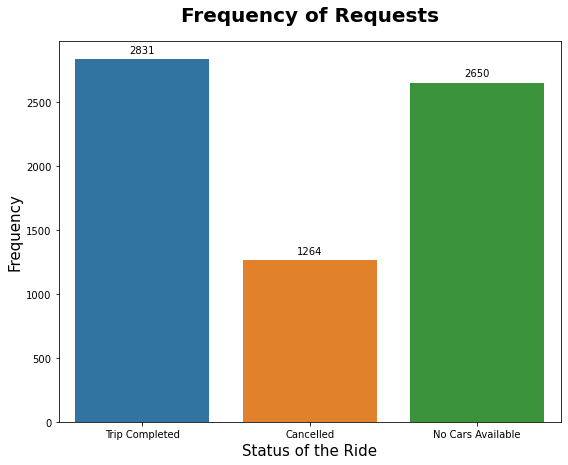

In [128]:
plt.figure(figsize=(9, 7))
status_plot = sns.countplot(x ='Status', data = uber_reqc)
for p in status_plot.patches:
    status_plot.annotate(format(p.get_height() ), 
                   (p.get_x() + p.get_width() / 2., p.get_height()), 
                   ha = 'center', va = 'center', 
                   xytext = (0, 9), 
                   textcoords = 'offset points')
plt.xticks(rotation = 0)
plt.xlabel('Status of the Ride',fontdict={'fontsize': 15})
plt.ylabel('Frequency',fontdict={'fontsize': 15})
plt.title('Frequency of Requests',
          fontweight="bold",fontdict={'fontsize': 20},pad=20)

We can see that "Cancelled" status and "No Cars Available" together has more counts than "Trip Completed" Status.Hence we can assume that trip completed status as supply and the rest two statuses as Demand.

Text(0.5, 1.0, 'Number of requests from Airport and City')

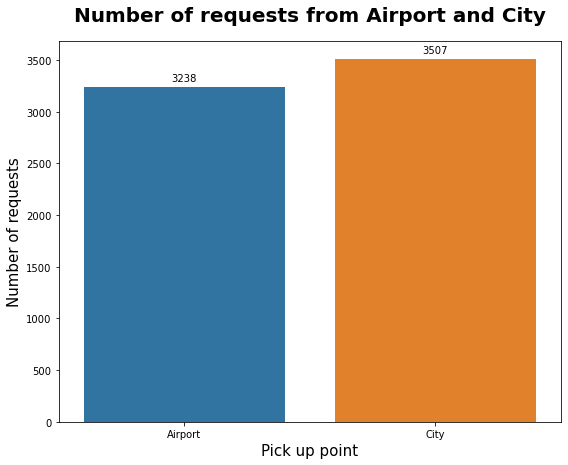

In [129]:
plt.figure(figsize=(9, 7))
pickup_plot = sns.countplot(x ='Pickup point', data = uber_reqc)
for p in pickup_plot.patches:
    pickup_plot.annotate(format(p.get_height() ), 
                   (p.get_x() + p.get_width() / 2., p.get_height()), 
                   ha = 'center', va = 'center', 
                   xytext = (0, 9), 
                   textcoords = 'offset points')
plt.xticks(rotation = 0)
plt.xlabel('Pick up point',fontdict={'fontsize': 15})
plt.ylabel('Number of requests',fontdict={'fontsize': 15})
plt.title('Number of requests from Airport and City',
          fontweight="bold",fontdict={'fontsize': 20},pad=20)

Number of requests are more from Cities compared to Airport


Text(0.5, 1.0, 'Number of requests from different time slots of the Day')

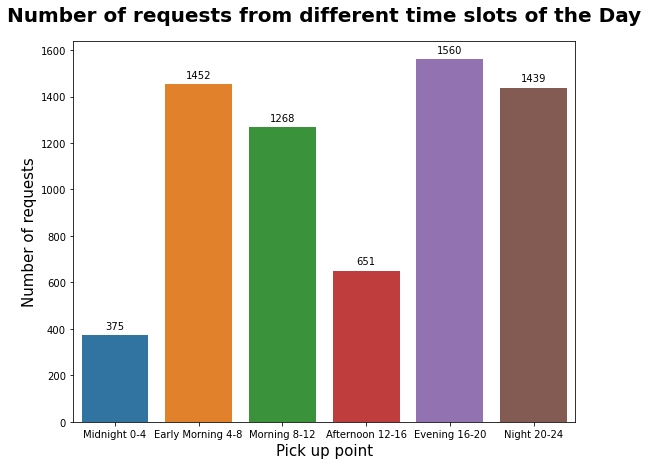

In [130]:
plt.figure(figsize=(9, 7))
day_plot = sns.countplot(x ='Day part', data = uber_reqc)
for p in day_plot.patches:
    day_plot.annotate(format(p.get_height() ), 
                   (p.get_x() + p.get_width() / 2., p.get_height()), 
                   ha = 'center', va = 'center', 
                   xytext = (0, 9), 
                   textcoords = 'offset points')
plt.xticks(rotation = 0)
plt.xlabel('Pick up point',fontdict={'fontsize': 15})
plt.ylabel('Number of requests',fontdict={'fontsize': 15})
plt.title('Number of requests from different time slots of the Day',
          fontweight="bold",fontdict={'fontsize': 20},pad=20)

## b.identify the most problematic types of requests (city to airport/airport to city etc.) and the time slots (early mornings, late evenings etc.) using plots

In [131]:
#Considering problematic types of requests(i.e., Rides getting Cancelled or No cars Available) 
#so filtering the dataframe with only cancelled and no cars available statuses
uber = uber_reqc[(uber_reqc["Status"]=="Cancelled") | (uber_reqc["Status"]=="No Cars Available")]

Text(0.5, 1.0, 'Number of Problematic requests( Rides getting Cancelled or No cars Available) from Pickup point')

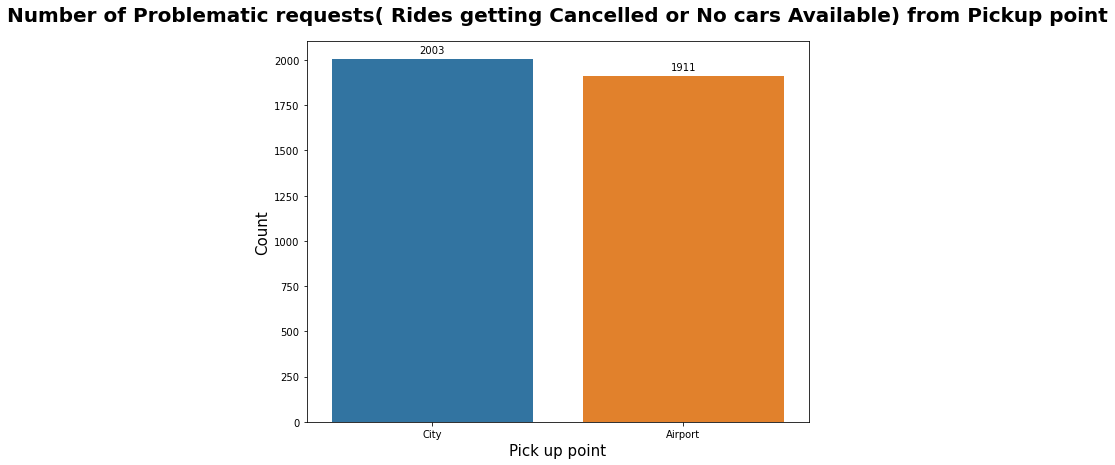

In [132]:
plt.figure(figsize=(9, 7))
pstatus_plot = sns.countplot(x ='Pickup point', data = uber)
for p in pstatus_plot.patches:
    pstatus_plot.annotate(format(p.get_height() ), 
                   (p.get_x() + p.get_width() / 2., p.get_height()), 
                   ha = 'center', va = 'center', 
                   xytext = (0, 9), 
                   textcoords = 'offset points')
plt.xticks(rotation = 0)
plt.xlabel('Pick up point',fontdict={'fontsize': 15})
plt.ylabel('Count',fontdict={'fontsize': 15})
plt.title('Number of Problematic requests( Rides getting Cancelled or No cars Available) from Pickup point',
          fontweight="bold",fontdict={'fontsize': 20},pad=20)

The most problematic types of requests(i.e., Rides getting Cancelled or No cars Available) are from city.

Text(0.5, 1.0, 'Number of Problematic requests( Rides getting Cancelled or No cars Available) from different time slots of the day')

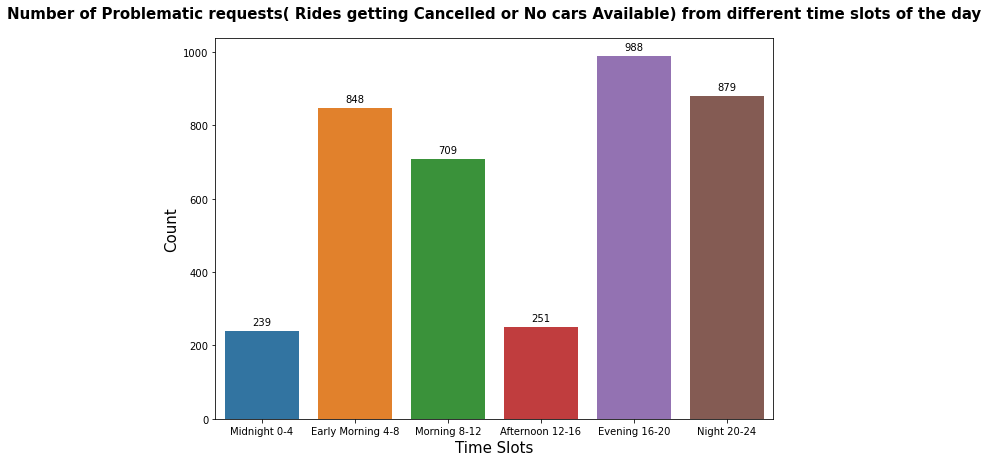

In [133]:
plt.figure(figsize=(10, 7))
pday_plot = sns.countplot(x ='Day part', data = uber)
for p in pday_plot.patches:
    pday_plot.annotate(format(p.get_height() ), 
                   (p.get_x() + p.get_width() / 2., p.get_height()), 
                   ha = 'center', va = 'center', 
                   xytext = (0, 9), 
                   textcoords = 'offset points')
plt.xticks(rotation = 0)
plt.xlabel('Time Slots',fontdict={'fontsize': 15})
plt.ylabel('Count',fontdict={'fontsize': 15})
plt.title('Number of Problematic requests( Rides getting Cancelled or No cars Available) from different time slots of the day',
          fontweight="bold",fontdict={'fontsize': 15},pad=20)

The most problematic types of requests(i.e., Rides getting Cancelled or No cars Available) are from Evening and night Time-slots and next comes from Early morning and Morning time slots.

# 2. Find out the gap between supply and demand and show the same using plots.

Here we assume Supply is where Status of the trip is "completed" and Demand is where Status of the trip is "Cancelled" or "No cars Available"

## a. Find the time slots when the highest gap exists

In [134]:
#Labelling the data "Supply" or "Demand" based on Status of the trip
uber_reqc["Supply_Demand"] = uber_reqc["Status"].apply(lambda x: "Supply" if x=="Trip Completed" else "Demand Gap")

In [135]:
uber_reqc

,Request id,Pickup point,Driver id,Status,Request timestamp,Drop timestamp,Request time,Day part,Supply_Demand
0,619,Airport,1.0,Trip Completed,2016-07-11 11:51:00,2016-07-11 13:00:00,11:51:00,Morning 8-12,Supply
1,867,Airport,1.0,Trip Completed,2016-07-11 17:57:00,2016-07-11 18:47:00,17:57:00,Evening 16-20,Supply
2,1807,City,1.0,Trip Completed,2016-07-12 09:17:00,2016-07-12 09:58:00,09:17:00,Morning 8-12,Supply
3,2532,Airport,1.0,Trip Completed,2016-07-12 21:08:00,2016-07-12 22:03:00,21:08:00,Night 20-24,Supply
4,3112,City,1.0,Trip Completed,2016-07-13 08:33:16,2016-07-13 09:25:47,08:33:16,Morning 8-12,Supply
...,...,...,...,...,...,...,...,...,...
6740,6745,City,NaN,No Cars Available,2016-07-15 23:49:03,NaT,23:49:03,Night 20-24,Demand Gap
6741,6752,Airport,NaN,No Cars Available,2016-07-15 23:50:05,NaT,23:50:05,Night 20-24,Demand Gap
6742,6751,City,NaN,No Cars Available,2016-07-15 23:52:06,NaT,23:52:06,Night 20-24,Demand Gap
6743,6754,City,NaN,No Cars Available,2016-07-15 23:54:39,NaT,23:54:39,Night 20-24,Demand Gap


Supply_Demand      Demand Gap  Supply
Day part                             
Midnight 0-4              239     136
Early Morning 4-8         848     604
Morning 8-12              709     559
Afternoon 12-16           251     400
Evening 16-20             988     572
Night 20-24               879     560


Text(0.5, 1.0, 'Supply and Demand from different time slots of the day')

<Figure size 2160x1800 with 0 Axes>

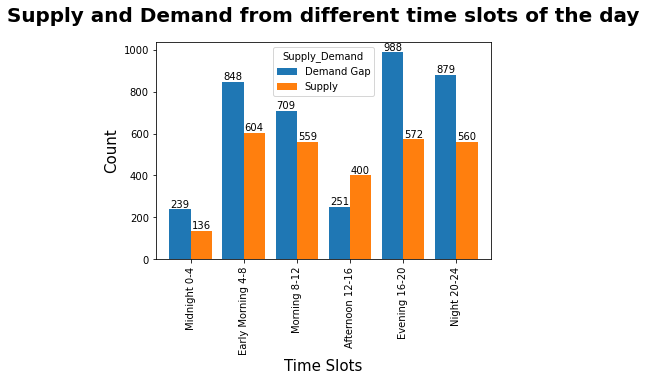

In [136]:
plt.figure(figsize=(30, 25))
CrosstabResult=pd.crosstab(index=uber_reqc['Day part'],columns=uber_reqc['Supply_Demand'])
print(CrosstabResult)
 
# Grouped bar chart between "Day part" and "Supply_Demand" columns
splot = CrosstabResult.plot.bar(width = 0.8)
for p in splot.patches:
    splot.annotate(format(p.get_height() ), 
                   (p.get_x() + p.get_width() / 2., p.get_height()), 
                   ha = 'center', va = 'center', 
                   xytext = (0, 5), 
                   textcoords = 'offset points')
plt.xticks(rotation = 90)
plt.xlabel('Time Slots',fontdict={'fontsize': 15})
plt.ylabel('Count',fontdict={'fontsize': 15})
plt.title('Supply and Demand from different time slots of the day',
          fontweight="bold",fontdict={'fontsize': 20},pad=20)

The highest gap exists in 2 slots, where two are from "Evening and Night" which can be considered as evening slots.


## b. Find the types of requests (city-airport or airport-city) for which the gap is the most severe in the identified time slots

Supply_Demand  Demand Gap  Supply
Pickup point                     
Airport              1911    1327
City                 2003    1504


Text(0.5, 1.0, 'Supply and Demand from different  pickup point')

<Figure size 720x792 with 0 Axes>

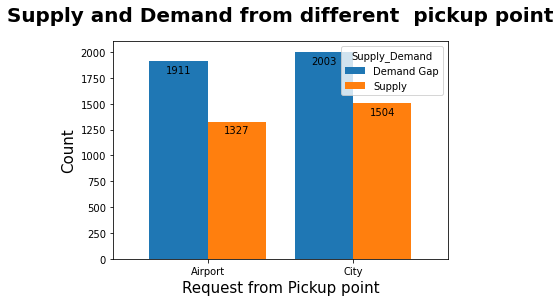

In [137]:
plt.figure(figsize=(10, 11))
gap_requests=pd.crosstab(index=uber_reqc['Pickup point'],columns=uber_reqc['Supply_Demand'])
print(gap_requests)
 
# Grouped bar chart between "Supply_Demand" and "Pickup point"
gap_requests_plot = gap_requests.plot.bar(width = 0.8)
for p in gap_requests_plot.patches:
    gap_requests_plot.annotate(format(p.get_height() ), 
                   (p.get_x() + p.get_width() / 2., p.get_height()), 
                   ha = 'center', va = 'center', 
                   xytext = (0, -9), 
                   textcoords = 'offset points')
plt.xticks(rotation = 0)
plt.xlabel('Request from Pickup point',fontdict={'fontsize': 15})
plt.ylabel('Count',fontdict={'fontsize': 15})
plt.title('Supply and Demand from different  pickup point',
          fontweight="bold",fontdict={'fontsize': 20},pad=20)

Both have almost same supply demand gap but request coming from Airport has more gap.



Pickup point         Airport              City       
Supply_Demand     Demand Gap Supply Demand Gap Supply
Day part                                             
Midnight 0-4            1.69   0.99       1.85   1.02
Early Morning 4-8       0.87   4.11      11.70   4.85
Morning 8-12            0.86   3.60       9.65   4.68
Afternoon 12-16         1.35   2.77       2.37   3.16
Evening 16-20          12.81   4.09       1.84   4.39
Night 20-24            10.75   4.11       2.28   4.20


<Figure size 2160x2520 with 0 Axes>

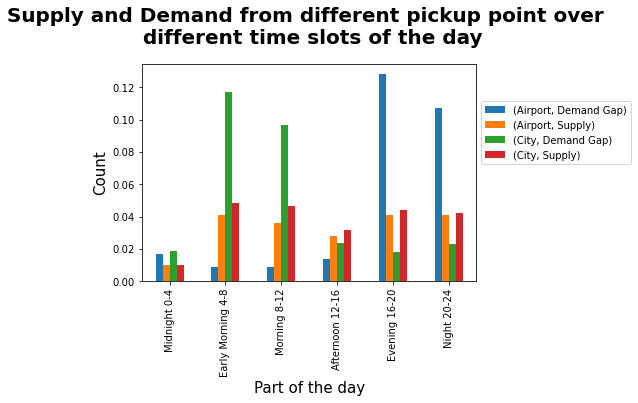

In [138]:
plt.figure(figsize=(30,35))
gap_request_day = pd.crosstab(uber_reqc["Day part"], [uber_reqc["Pickup point"],
                               uber_reqc["Supply_Demand"]],normalize="all")
print(round(gap_request_day*100,2))
 
# Grouped bar chart between "Day part","Supply_Demand" and "Pickup point"
a = gap_request_day.plot(kind='bar', rot=90)
plt.xlabel('Part of the day',fontdict={'fontsize': 15})
plt.ylabel('Count',fontdict={'fontsize': 15})
plt.title('Supply and Demand from different pickup point over \n different time slots of the day',
          fontweight="bold",fontdict={'fontsize': 20},pad=20)
plt.legend(bbox_to_anchor =(1, 0.85))

a. The highest gap exists in 4 slots one is from "Early Morning(Demand is 11.7% and supply is 4.85%) and Morning(Demand is 9.65% and supply is 4.68%)" which can be considered as morning slots itself and most of the requests are coming from City.
b. Other is from "Evening(Demand is 12.81% and Supply is 4.09%) and Night(Demand is 10.75% and Suppply is 4.11%)" which can be considered as night slots itself and most of the requests are coming from Airport

# What do you think is the reason for this issue for the supply-demand gap? Write the answer in less than 100 words. You may accompany the write-up with plot(s).

In [139]:
#Where Status of the rides are "Cancelled"
#so filtering the dataframe with only cancelled status and Trip completed Status
uber_c = uber_reqc[(uber_reqc["Status"]=="Cancelled") | (uber_reqc["Status"]=="Trip Completed")]

In [140]:
uber_c

,Request id,Pickup point,Driver id,Status,Request timestamp,Drop timestamp,Request time,Day part,Supply_Demand
0,619,Airport,1.0,Trip Completed,2016-07-11 11:51:00,2016-07-11 13:00:00,11:51:00,Morning 8-12,Supply
1,867,Airport,1.0,Trip Completed,2016-07-11 17:57:00,2016-07-11 18:47:00,17:57:00,Evening 16-20,Supply
2,1807,City,1.0,Trip Completed,2016-07-12 09:17:00,2016-07-12 09:58:00,09:17:00,Morning 8-12,Supply
3,2532,Airport,1.0,Trip Completed,2016-07-12 21:08:00,2016-07-12 22:03:00,21:08:00,Night 20-24,Supply
4,3112,City,1.0,Trip Completed,2016-07-13 08:33:16,2016-07-13 09:25:47,08:33:16,Morning 8-12,Supply
...,...,...,...,...,...,...,...,...,...
4090,1641,City,299.0,Cancelled,2016-07-12 07:20:00,NaT,07:20:00,Early Morning 4-8,Demand Gap
4091,4158,City,299.0,Cancelled,2016-07-14 05:03:10,NaT,05:03:10,Early Morning 4-8,Demand Gap
4092,4164,City,299.0,Cancelled,2016-07-14 05:06:40,NaT,05:06:40,Early Morning 4-8,Demand Gap
4093,4448,City,299.0,Cancelled,2016-07-14 08:30:59,NaT,08:30:59,Morning 8-12,Demand Gap


Pickup point         Airport              City       
Supply_Demand     Demand Gap Supply Demand Gap Supply
Day part                                             
Midnight 0-4            0.00   1.64       0.34   1.68
Early Morning 4-8       0.37   6.76      12.84   7.99
Morning 8-12            0.59   5.93       9.91   7.72
Afternoon 12-16         0.88   4.57       0.81   5.20
Evening 16-20           1.54   6.74       1.03   7.23
Night 20-24             1.47   6.76       1.10   6.91


Text(0.5, 1.0, 'Supply and Demand gap from different pickup point \n where rides are cancelled over the day')

<Figure size 2160x1800 with 0 Axes>

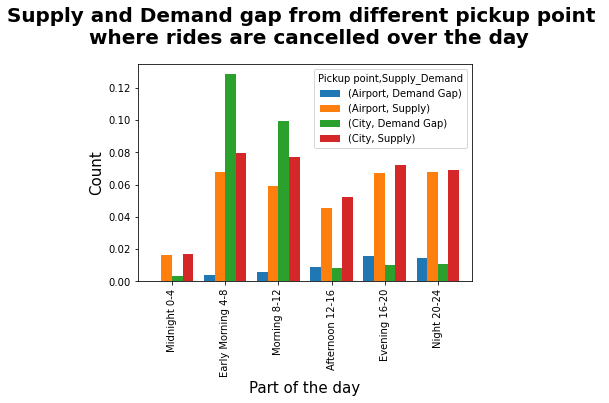

In [141]:
plt.figure(figsize=(30, 25))
gap_request_cancel = pd.crosstab(uber_c["Day part"], [uber_c["Pickup point"],
                               uber_c["Supply_Demand"]],normalize="all")
print(round(gap_request_cancel*100,2))

# Grouped bar chart between "Day part","Supply_Demand" and "Pickup point"

gap_request_cancel.plot.bar(width = 0.8)
plt.xlabel('Part of the day',fontdict={'fontsize': 15})
plt.ylabel('Count',fontdict={'fontsize': 15})
plt.title('Supply and Demand gap from different pickup point \n where rides are cancelled over the day',
          fontweight="bold",fontdict={'fontsize': 20},pad=20)

The highest gap exists in 2 slots  from "Early Morning(Demand 12.84% and Supply 7.99%) and Morning(Demand 9.91% and Supply 7.72%)" which can be considered as morning slots itself and most of the requests are coming from City. 


In [142]:
#Where Status of the rides are "No Cars Available"
#so filtering the dataframe with only No cars available status and Trip completed Status
uber_nca = uber_reqc[(uber_reqc["Status"]=="No Cars Available") | (uber_reqc["Status"]=="Trip Completed")]

In [143]:
uber_nca

,Request id,Pickup point,Driver id,Status,Request timestamp,Drop timestamp,Request time,Day part,Supply_Demand
0,619,Airport,1.0,Trip Completed,2016-07-11 11:51:00,2016-07-11 13:00:00,11:51:00,Morning 8-12,Supply
1,867,Airport,1.0,Trip Completed,2016-07-11 17:57:00,2016-07-11 18:47:00,17:57:00,Evening 16-20,Supply
2,1807,City,1.0,Trip Completed,2016-07-12 09:17:00,2016-07-12 09:58:00,09:17:00,Morning 8-12,Supply
3,2532,Airport,1.0,Trip Completed,2016-07-12 21:08:00,2016-07-12 22:03:00,21:08:00,Night 20-24,Supply
4,3112,City,1.0,Trip Completed,2016-07-13 08:33:16,2016-07-13 09:25:47,08:33:16,Morning 8-12,Supply
...,...,...,...,...,...,...,...,...,...
6740,6745,City,NaN,No Cars Available,2016-07-15 23:49:03,NaT,23:49:03,Night 20-24,Demand Gap
6741,6752,Airport,NaN,No Cars Available,2016-07-15 23:50:05,NaT,23:50:05,Night 20-24,Demand Gap
6742,6751,City,NaN,No Cars Available,2016-07-15 23:52:06,NaT,23:52:06,Night 20-24,Demand Gap
6743,6754,City,NaN,No Cars Available,2016-07-15 23:54:39,NaT,23:54:39,Night 20-24,Demand Gap


Pickup point         Airport              City       
Supply_Demand     Demand Gap Supply Demand Gap Supply
Day part                                             
Midnight 0-4            2.08   1.22       2.03   1.26
Early Morning 4-8       0.80   5.05       4.80   5.97
Morning 8-12            0.62   4.43       4.47   5.77
Afternoon 12-16         1.00   3.41       2.32   3.89
Evening 16-20          14.61   5.04       1.50   5.40
Night 20-24            12.13   5.05       1.99   5.16


Text(0.5, 1.0, 'Supply and Demand gap from different pickup point \n where No cars are Available over the day')

<Figure size 2160x1800 with 0 Axes>

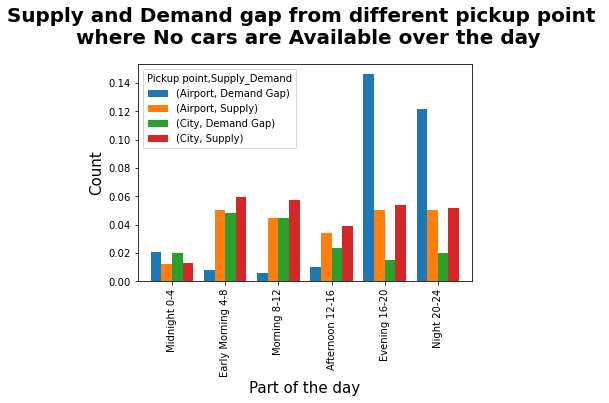

In [144]:
plt.figure(figsize=(30, 25))
gap_request_nca = pd.crosstab(uber_nca["Day part"], [uber_nca["Pickup point"],
                               uber_nca["Supply_Demand"]],normalize="all")
print(round(gap_request_nca*100,2))

# Grouped bar chart between "Day part","Supply_Demand" and "Pickup point"

gap_request_nca.plot.bar(width = 0.8)
plt.xlabel('Part of the day',fontdict={'fontsize': 15})
plt.ylabel('Count',fontdict={'fontsize': 15})
plt.title('Supply and Demand gap from different pickup point \n where No cars are Available over the day',
          fontweight="bold",fontdict={'fontsize': 20},pad=20)

The highest gap exists in 2 slots  from "Evening(Demand 14.61% and Supply 5.04%) and Night(Demand 12.13% and Supply 5.05%)" which can be considered as Night slots itself and most of the requests are coming from Airport. 
Where Status of the rides are "No Cars Available".

From the above graphs we can think the reason for the issues.
1. Drivers may typically earn more money and more rides during the morning hours than they could by accepting rides to airports.
    The City to Airport is busier in the morning.
    Drivers frequently have to return to the city without any riders because early morning and morning flights typically land less frequently than flights at night hence they cancel the rides.
2. There won't be as many drivers working at night as there are during the day because most of the drivers are day shift drivers, and more international planes will land then, increasing demand for cabs during these times, creating a gap between supply and demand.



# Recommend some ways to resolve the supply-demand gap.

### For Morning Hours Where Demand is more from City and Cancellation is more.

1. By paying drivers more if they return without any rides from airport, we can close the pay difference.
2. If there is heavy traffic, we might offer the drivers more money before taking the journey to encourage them to accept it.
3. There has to be limit for cancellation per day and if the driver exceeds the limit, then penalty has to be imposed.

### For Evening Hours Where Demand is more from Airport and Status is Cars Unavailable is more.

1. By charging drivers who work late hours an overtime fee, we can close the disparity.
2. We are able to start exclusive night cabs for airport service close to airports.